<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure:

### Exploratory Data Analysis


<div style="color:#00BFFF">

---

##### **Introduction: Uncovering Reliable Proxies for Consumer Spending Behaviour**


<div style="color:#FF7F50">

**1.1. Introduction: The Problem (Why)**

</div>

The current quarterly GDP reports lag in reflecting the dynamic changes in the economy, impacting decision-makers who rely on timely economic data. This project is devised to mitigate this issue by identifying high-frequency, readily updated data proxies that offer quicker insights into consumer expenditure patterns.

<div style="color:#FF7F50">

**1.2. Project Scope and Objectives (What)**

</div>
The project's primary objective is to systematically identify, harmonise, and validate high-frequency data sources as proxies for real-time tracking of consumer expenditure in the United States. The goal is to refine these proxies to provide more immediate data on consumer spending habits, thus bridging the gap caused by the delayed reporting of official GDP figures.

**Key Questions:**

- Which high-frequency data sources can serve as accurate proxies for consumer spending?
- How can we validate these proxies against established measures of consumer expenditure?
- What techniques can we employ to ensure these proxies offer immediate and reliable insights into current consumer spending trends?
- How will we address potential discrepancies between different data sources in terms of scale, units, or reporting standards?
- Are there any unforeseen challenges in harmonizing data frequencies (monthly vs. quarterly) that could impact the accuracy of our analysis?
- How can we ensure the economic relevance of our findings, beyond statistical correlations?
- What contingency plans do we have for dealing with data anomalies or irregularities that might skew our analysis?

<div style="color:#FF7F50">

**1.3. Methodology**

</div>
The methodology is designed to focus on data preparation and validation:

- **Exploratory Data Analysis (EDA)**: To understand the characteristics and quality of the high-frequency monthly indicators and their initial relationships to consumer spending.
- **Proxy Validation**: To establish a correlation with established measures of consumer spending through statistical analysis, ensuring that the proxies are reliable and relevant.

<div style="color:#FF7F50">

**1.4. Assumptions**

</div>

**Data Quality and Relevance:** We operate under the assumption that the high-frequency data from FRED and other sources accurately reflect current economic trends and consumer sentiments. However, there is an inherent risk of data bias or inaccuracy, which could impact the reliability of our findings.

**Predictive Power and Relevance:** While we aim to identify effective proxies for consumer expenditure, there's a risk that these proxies may not fully capture the complexities of consumer behaviour or may not adapt swiftly to sudden economic shifts.

**External Factors:** The project also assumes a stable economic environment. Sudden external shocks (like global events or policy changes) could significantly affect consumer behaviour, potentially reducing the predictive accuracy of our proxies.


<div style="color:#00BFFF">

##### Visualization Code Organization

</div>


In our effort to maintain the readability and manageability of this Jupyter Notebook, we have placed the more complex visualization codes in a separate directory.

This approach ensures that our Notebook remains focused on analysis and findings, while the detailed code for generating visuals can be found in the `visualisation.py` file located within the `utils.visualisation` folder.

<div style="color:#FF7F50">

**Implementation Method**

</div>

To utilize the visualization functions from our modular code, we import the required functions directly into our Notebook. This method allows us to keep the Notebook clean and focused, with the heavy lifting done behind the scenes. Here's a quick example of how to import and use a visualization function:

```python
from visualisations.plot_chart import plot_chart

# Example usage
plot_chart(data)
```

<div style="color:#FF7F50">

**Benefits of Modular Design**

</div>

Adopting a modular design for our visualization code comes with several key benefits:

- **Organization:** By segregating complex visualization scripts into the `utils.visualisation` folder, we enhance the overall organization of the project. This separation ensures that the Notebook stays clean and accessible, with the codebase neatly organized for easy navigation.

- **Reusability:** Housing our visualization tools in a dedicated module promotes reusability. This setup allows us and other team members to reuse and adapt the visualization code across different notebooks, ensuring consistency and saving time.

- **Enhanced Collaboration:** With a standardized set of visualization tools, team members can collaborate more effectively, knowing exactly where to find and how to use these resources.


<div style="color:#00BFFF">

---

##### Setup Environment and import libraries


In [1]:
# ------- Standard Library Imports -------
import warnings
from datetime import datetime
from pprint import pprint
from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
from pandas import NaT
import numpy as np

# Utility and display modules
from IPython.display import display, HTML

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


%matplotlib inline

# Remove warnings
warnings.filterwarnings("ignore")

# Set the display options
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_77137/2888153758.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# load data generated from [1]M1_clean_and_preprocess.ipynb

# open defn
defn = pd.read_csv("./results/fred/fred_indicator_mappings.csv", index_col=0)

# open joined_dataset.csv
joined_dataset = pd.read_csv(
    "./results/merged_data/joined_dataset_transformed.csv",
    index_col=0,
    parse_dates=True,
)

In [3]:
#the index is not in datetime format, we need to convert it to datetime and subtract 1 day from each date
joined_dataset.sort_index(inplace=True)
joined_dataset.index = pd.to_datetime(joined_dataset.index)
joined_dataset.index = joined_dataset.index - pd.Timedelta(days=1)

#change to format YYYYMM
joined_dataset.index = joined_dataset.index.strftime('%Y%m')

joined_dataset.tail()

,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
202209,1.533394,1.035867,1.456932,0.733035,1.888560,-0.340469,0.816630,0.508764,0.564030,-0.060831,-0.266331,-0.008368,2.149355,1.148606,1.371123,-1.162086,0.661687,3.072877,0.3200,0.333994,0.490837,-0.1,-2.1,-3.822121,5.262704,-6.05

<div style="color:#00BFFF">

---

##### Descriptive Statistics and exploring distributions of indicators


<div style="color:#FF7F50">

**Descriptive Statistics Overview**
</div>

Our exploratory data analysis (EDA) focuses on examining the distribution and variability of various economic indicators that potentially serve as proxies for forecasting the United States Personal Consumption Expenditures (PCE). Through descriptive statistics and distribution exploration, we aim to understand the underlying economic group dynamics and individual indicator volatilities. This analysis is critical for identifying reliable proxies that can offer immediate insights into consumer spending behaviors, thus aiding in nowcasting consumer expenditure more accurately than traditional methods.

The descriptive statistics for each economic group reveal significant insights into the distribution and central tendencies of the indicators. By grouping indicators into categories such as Consumption, Orders, and Inventories; Housing; Interest and Exchange Rates; Labor Market; Money and Credit; Output and Income; Prices; and Stock Market, we provide a structured view of their behavior over time.

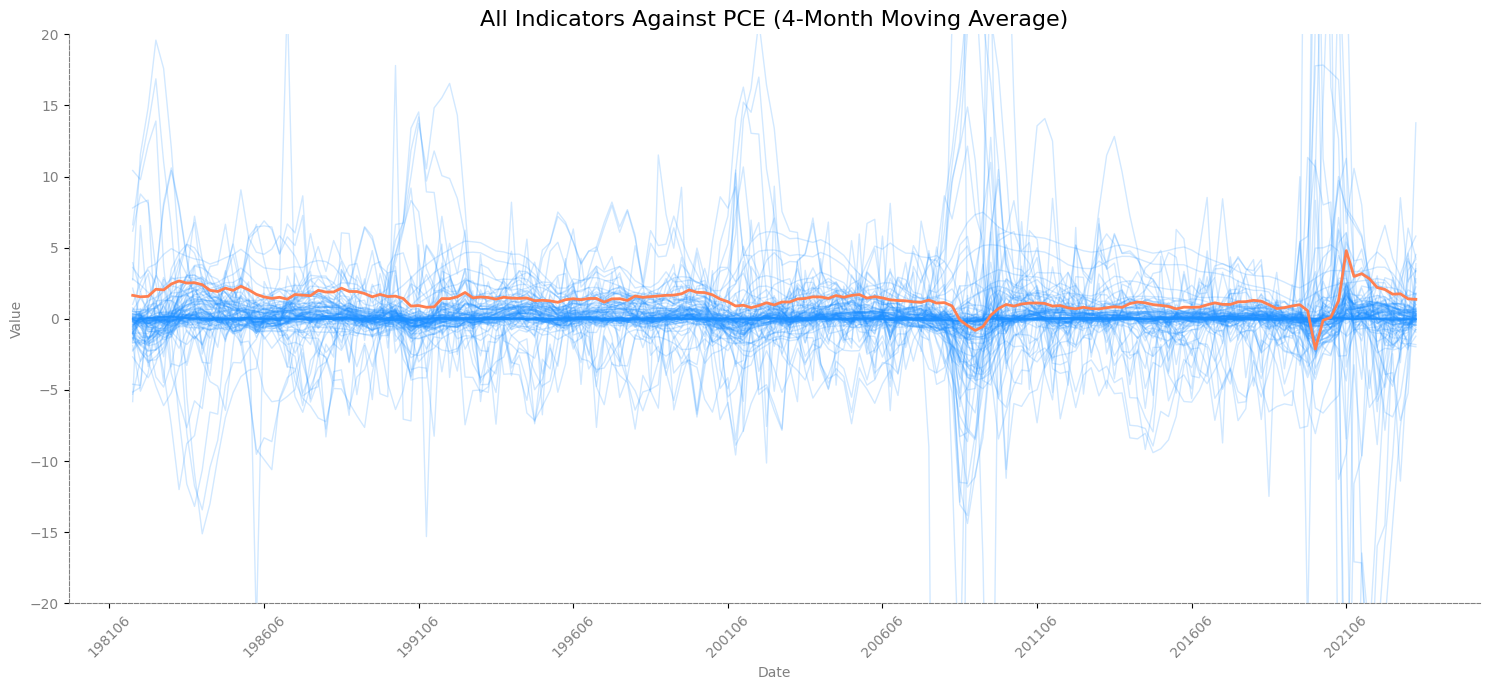

In [4]:

from visualisations.plot_indicators_with_emphasis_on_pce import plot_indicators_with_emphasis_on_pce

# Note: Make sure 'joined_dataset' and 'target_correlations' are defined before calling this function.
plot_indicators_with_emphasis_on_pce(joined_dataset, joined_dataset.columns)


In [5]:
# Reload the dataset and mappings

mappings_path = "./results/fred/fred_indicator_mappings.csv"


mappings = pd.read_csv(mappings_path)

# Since column names in final_proxy_dataset correspond to the 'description' in mappings,
# map 'description' to 'group'
description_to_group = mappings.set_index("description")["group"].to_dict()

# Prepare long-format final_proxy_dataset for box plots
long_data = joined_dataset.reset_index().melt(
    id_vars=["index"], var_name="Indicator", value_name="Value"
)
long_data["Group"] = long_data["Indicator"].map(description_to_group)

# Check the first few rows to confirm the mapping
long_data.head()

,index,Indicator,Value,Group
0,198106,PCE,1.672315,NaN
1,198109,PCE,2.095236,NaN
2,198112,PCE,0.828994,NaN
3,198203,PCE,1.995754,NaN
4,198206,PCE,1.253162,NaN


In [6]:
# Descriptive statistics for each economic group
descriptive_stats = long_data.groupby('Group')['Value'].describe()

# Displaying descriptive statistics
descriptive_stats


,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
"Consumption, Orders, and Inventories",1360.0,0.737729,3.934384,-25.490640,-0.040000,0.615156,1.728126,26.347205
Housing,1690.0,0.001436,0.154013,-1.246248,-0.076247,0.006796,0.075839,0.969995
Interest and Exchange Rates,3570.0,0.330846,2.440428,-19.060144,-0.300000,0.060000,0.845894,17.225656
Labor Market,4926.0,0.034982,7.125655,-143.812682,-0.387603,0.123256,0.585431,229.523329
Money and Credit,2040.0,0.111585,12.339394,-281.071429,-0.750130,0.002825,1.074090,147.534517
Output and Income,2550.0,0.407178,2.094556,-17.178392,-0.295831,0.549609,1.340323,20.031441
Prices,3400.0,0.002211,6.758564,-90.038674,-0.577723,-0.008309,0.594744,108.609365
Stock Market,510.0,1.412363,6.229968,-32.695768,-0.131020,0.234729,4.386307,20.146885


<div style="color:#FF7F50">

**Observations**

</div>

- **Consumption, Orders, and Inventories** exhibit a mean of 0.737729 with a high standard deviation (std) of 3.934384, indicating considerable volatility within this group. The wide range between the minimum and maximum values suggests diverse impacts on consumer expenditure.
  
- **Housing** and **Interest and Exchange Rates** show relatively low means, highlighting their subtle yet potentially steady influence on consumer spending.
  
- **Labor Market**, **Money and Credit**, and **Prices** demonstrate high variability, as evidenced by their std, signifying their sensitivity to economic changes and their potential as predictive indicators for PCE.

- The **Stock Market** group stands out with a notably higher mean, suggesting its potential as a strong proxy for consumer confidence and spending patterns.

In [7]:
# Calculate standard deviation for each economic group
volatility_analysis = long_data.groupby('Group')['Value'].std()

# Displaying volatility analysis
volatility_analysis.sort_values(ascending=False)


Group
Money and Credit                        12.339394
Labor Market                             7.125655
Prices                                   6.758564
Stock Market                             6.229968
Consumption, Orders, and Inventories     3.934384
Interest and Exchange Rates              2.440428
Output and Income                        2.094556
Housing                                  0.154013
Name: Value, dtype: float64

<div style="color:#FF7F50">

**Volatility Analysis**
</div>

The volatility analysis, sorted by the standard deviation of values within each economic group, underscores the variability and inherent risks associated with predicting consumer behavior.

- **Money and Credit** and **Labor Market** are the most volatile groups, indicating their susceptibility to rapid changes in economic conditions. This volatility reflects the complex dynamics of monetary policy effects and employment trends on consumer spending.

- **Prices** and **Stock Market** follow, suggesting fluctuations in inflation and stock market performance significantly impact consumer expenditure patterns.

- **Housing** shows the least volatility, indicating its stability as an economic indicator over time.

<div style="color:#FF7F50">

**Indicator-Specific Volatility and Variance Analysis**
</div>

- Focusing on individual indicators, the analysis highlights those with the highest volatility and variance, such as **Reserves Of Depository Institutions** and **Crude Oil Prices**. 

- These indicators demonstrate extreme fluctuations, which can offer valuable insights into economic conditions impacting consumer spending.

<div style="color:#FF7F50">

In [8]:
# Calculate standard deviation and variance for each indicator
volatility_analysis = long_data.groupby('Indicator')['Value'].std().rename('Volatility')
variance_analysis = long_data.groupby('Indicator')['Value'].var().rename('Variance')

# Merge the two Series into a single DataFrame
indicator_analysis_df = pd.concat([volatility_analysis, variance_analysis], axis=1)

# Sort the DataFrame by Volatility (or Variance if preferred)
sorted_indicator_analysis_df = indicator_analysis_df.sort_values(by='Volatility', ascending=False)

# Display the top 10 indicators sorted by Volatility
print(sorted_indicator_analysis_df.head(10))



                                            Volatility     Variance
Indicator                                                          
Reserves Of Depository Institutions          32.191422  1036.287662
Crude Oil, spliced WTI and Cushing           26.748246   715.468650
Total Reserves of Depository Institutions    22.803917   520.018621
Initial Claims                               20.673862   427.408585
Civilians Unemployed for 5-14 Weeks          19.160028   367.106662
Civilians Unemployed for 15-26 Weeks         16.849686   283.911905
M1 Money Stock                               14.385436   206.940765
Civilians Unemployed for 27 Weeks and Over   12.878204   165.848146
Civilians Unemployed - 15 Weeks & Over       12.452538   155.065715
New Orders for Nondefense Capital Goods       9.172461    84.134034


In [9]:
from visualisations.plot_indicator_boxplot import plot_indicator_boxplot

plot_indicator_boxplot(long_data)

<div style="color:#FF7F50">

**Economic Implications and Proxy Validation**

</div>

The descriptive statistics and volatility analyses provide a foundation for understanding the economic implications of each group and indicator. High volatility in **Money and Credit** and **Labor Market** groups suggests their strong linkage with consumer confidence and spending. Conversely, the stability in **Housing** indicates its reliability but potentially less sensitivity to immediate economic shifts.

The indicators with the highest variance, such as **Reserves Of Depository Institutions** and **Crude Oil Prices**, may serve as early warning signals for shifts in consumer spending patterns, albeit with caution due to their high volatility.

This detailed analysis of descriptive statistics and volatility across economic indicators underscores the complexity of predicting consumer expenditure. While some groups and indicators show promise as proxies for nowcasting PCE, their varying degrees of volatility and economic impact must be carefully considered. By validating these proxies against established measures of consumer expenditure, we can refine our approach to forecasting consumer spending behavior, enhancing the timeliness and accuracy of economic analyses.

<div style="color:#00BFFF">

---

##### Explore Comparability between PCE and economic indicators


<div style="color:#FF7F50">

Next Steps:

</div>

To gain a better understanding of these relationships, we will proceed by plotting line graphs of selected indicators against PCE. This visual analysis will help us observe the trends over time and may provide insights into any anomalies or patterns that warrant a deeper investigation.

We employ the `top_indicators_against_pce_line_graph` function from our `utils.visualisation` module to illustrate the relationship between Personal Consumption Expenditures (PCE) and its top correlated economic indicators. This visualization helps us understand how these indicators interact with PCE over time.

<div style="color:#FF7F50">

Key Steps:

</div>

1. **Identify Strong Correlations:** Calculates correlations between PCE and dataset variables to pinpoint the most influential indicators.

   - Given our scenario where we are analyzing a large number of indicators (123) across a lengthy period (1960 to 2023) to find those that best correlate with private consumption expenditure, and we want to retain NaN values due to their economic significance, `Spearman's rank correlation` with pairwise deletion seems to be the most appropriate.

   - `Spearman's rank correlation` is non-parametric and does not assume a linear relationship between variables, which can be more appropriate for economic data. It respects the economic significance of NaN values while providing a robust correlation measure. Handling NaN values by default in many implementations, where it ignores pairs where either value is NaN. It also is also less sensitive to outliers (which is relevant given that we have replaced some extreme values with NaN).

2. **Visual Comparison:** Generates line graphs for each top indicator against PCE, offering a clear visual of their movements over a selected period.


In [10]:
# Calculate the Spearman's rank correlation with the private consumption expenditure,
correlation_matrix = joined_dataset.corr(method="spearman")

# target_correlations will have the Spearman's rank correlation coefficients
target_correlations = correlation_matrix["PCE"].sort_values(ascending=False)

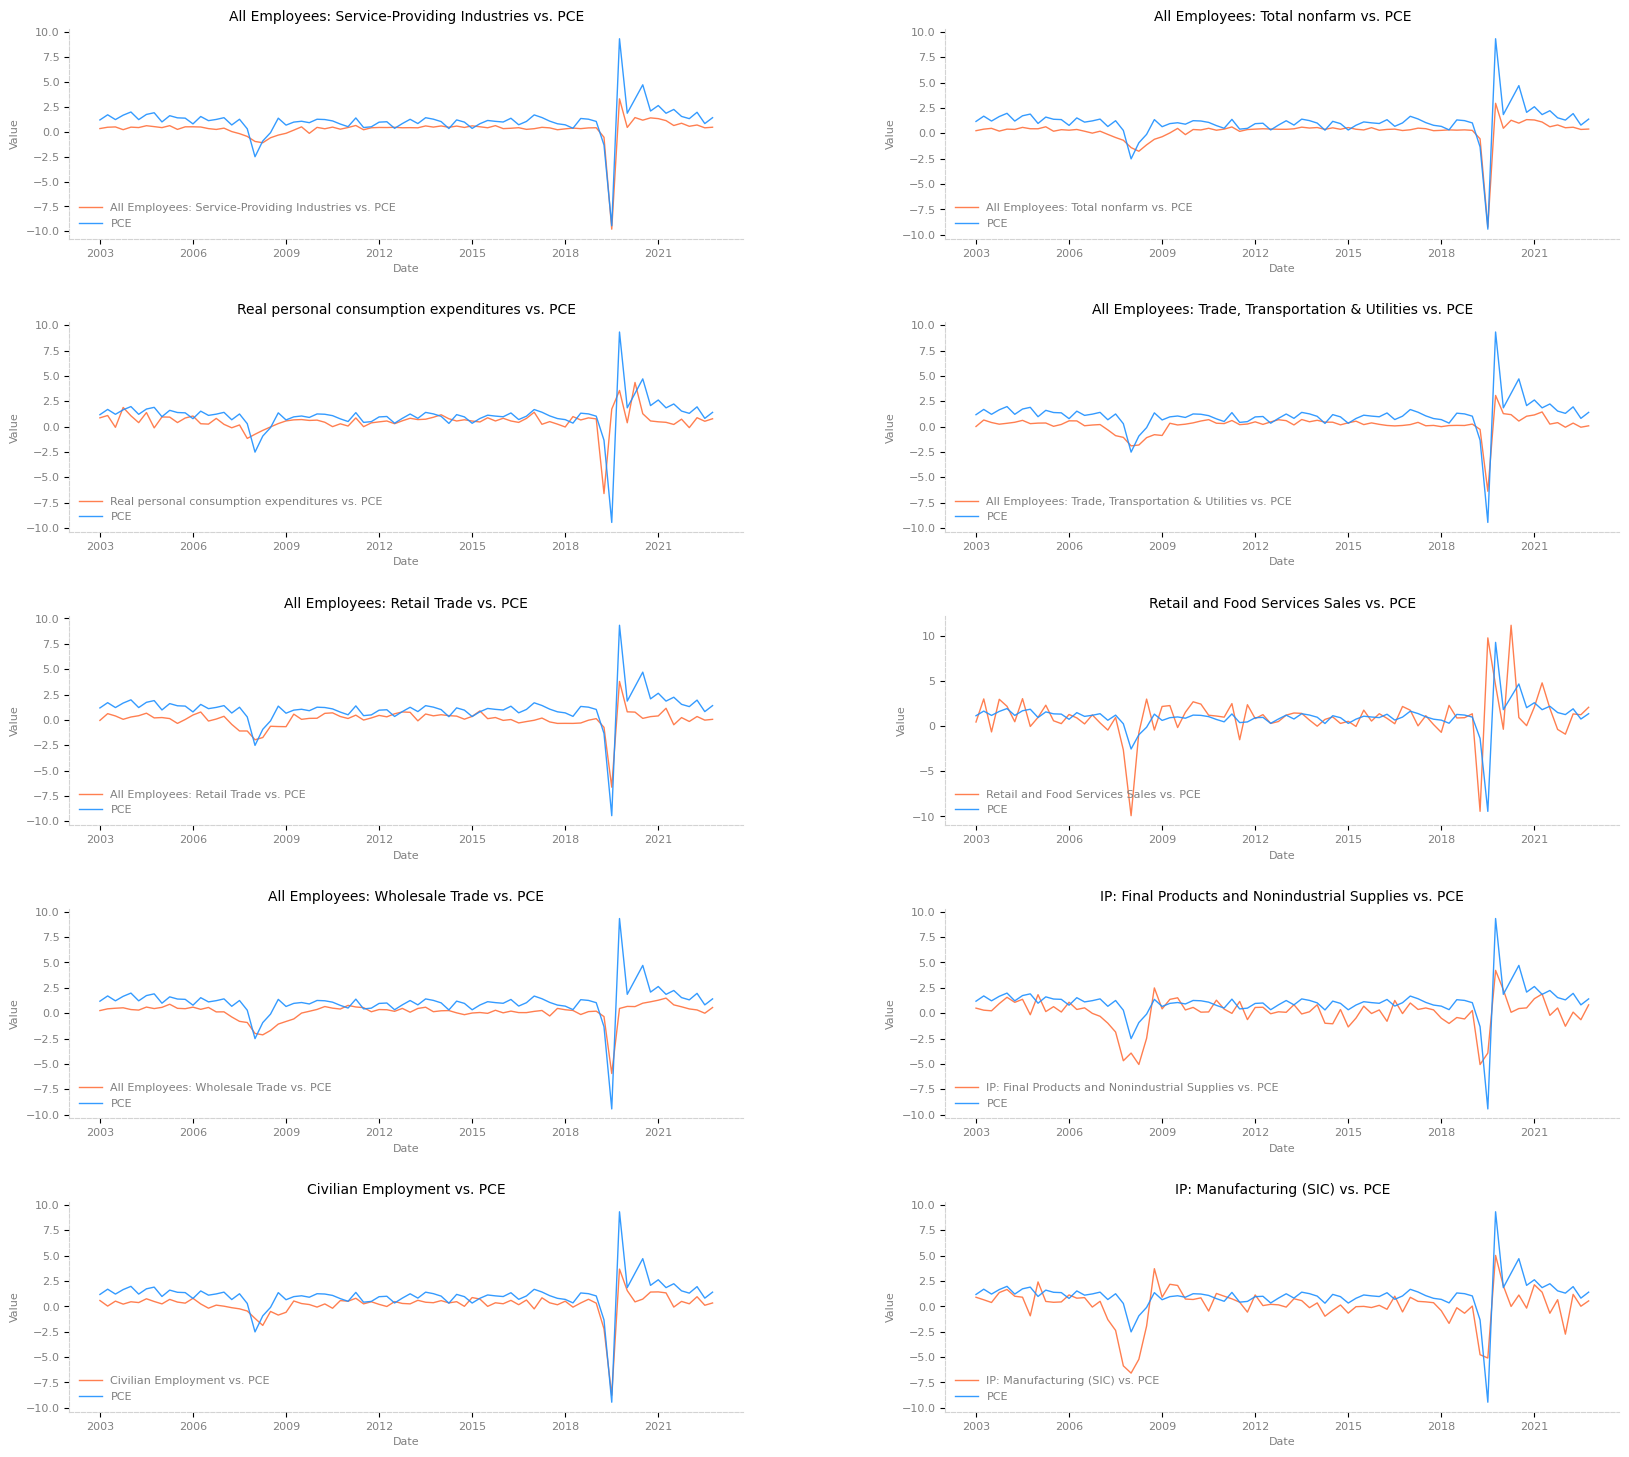

In [11]:
from visualisations.top_indicators_against_pce_line_graph import top_indicators_against_pce_line_graph

top_indicators_against_pce_line_graph(
    joined_dataset, target_correlations, top_n=10
)  # top_n is the number of top indicators to plot

<div style="color:#FF7F50">

**Key Observations:**

</div>

The initial line graphs juxtaposing top indicators with Personal Consumption Expenditures (PCE) highlight notable positive change in scale following transformation it also shows a particularly strong relationship with labour indicators.

<div style="color:#00BFFF">

---

##### Correlation Analysis


<div style="color:#FF7F50">

**Spearman Correlation Analysis between Indicators**

</div>

In our data analysis process, understanding the relationship between different variables and our target variable, Personal Consumption Expenditures (PCE), is crucial. To achieve this, we employ a methodical approach to calculate correlations, allowing us to quantify the linear relationship between each variable in the dataset and the PCE.

Calculating sorted correlations serves several key purposes:

- **Identify Strong Relationships:** By sorting correlations, we prioritize variables that have a strong linear relationship with the PCE, either positively or negatively. This enables us to focus our analysis on variables that are most influential to our target variable.

- **Enhance Interpretability:** Sorting correlations by their absolute values, while retaining their original signs, allows us to easily interpret the direction and strength of each relationship. This dual perspective is essential for a nuanced understanding of how variables interact within our dataset.


<div style="color:#FF7F50">

**plot_correlations Function:**

</div>

- **Selection:** Identifies top N positively and bottom N negatively correlated indicators with PCE.

- **Visualization:** Uses a horizontal bar plot to contrast positive (skyblue) and negative (salmon) correlations, with a clear demarcation at zero correlation.

- **Purpose:** Facilitates quick identification of significant economic indicators related to PCE, guiding targeted analysis and hypothesis development.

- **Parameters:**
  - correlation_series: pd.Series with correlation values indexed by indicator names.
  - top_n: Number of top positively correlated indicators to display.
  - bottom_n: Number of bottom negatively correlated indicators to display.


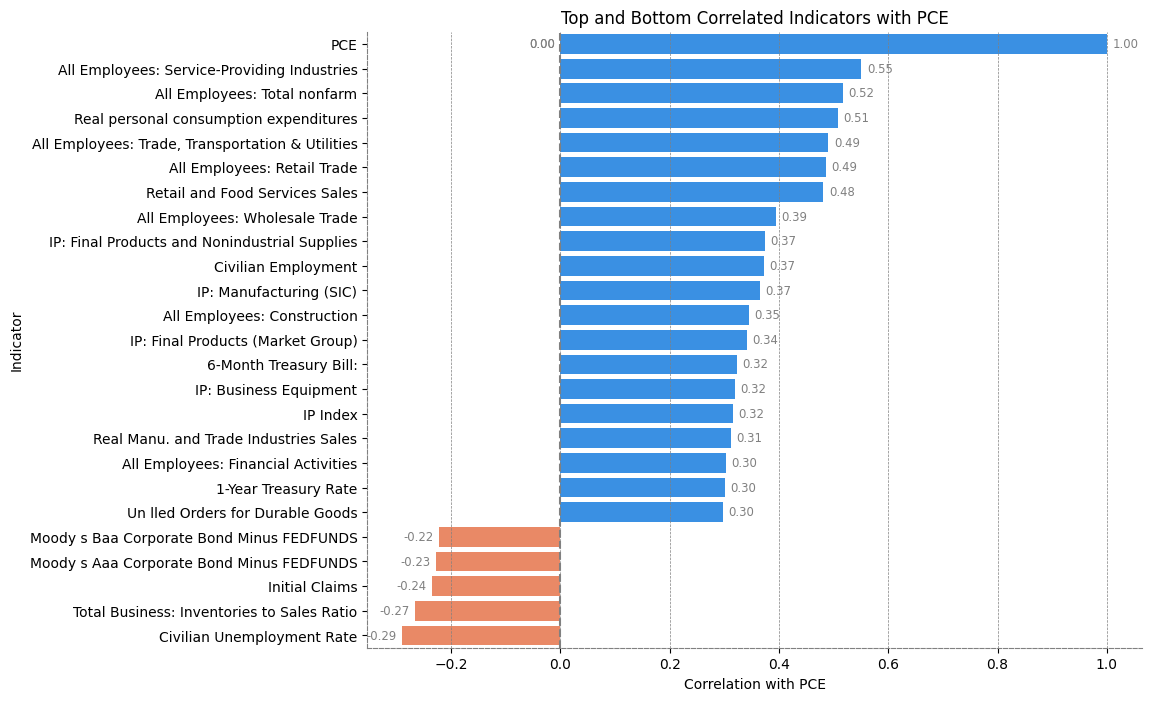

In [12]:
from visualisations.plot_correlations import plot_correlations

# call the plot_correlations function
plot_correlations(target_correlations, top_n=20, bottom_n=5)

In [13]:
def calculate_sorted_correlations(dataset, target_columns):
    """
    Calculate correlations of all columns in the dataset with a target column,
    sort them by the absolute value of the correlation, and return as a Series while retaining
    the original positive or negative signs.
    """
    # Ensure the index is in datetime format
    #dataset.index = pd.to_datetime(dataset.index)

    # Calculate Pearson correlation with target column
    correlation_with_target = dataset.corrwith(
        dataset[target_columns], method="spearman"
    )

    # Sort the correlations by absolute value, but retain the original values
    sorted_correlations = correlation_with_target.reindex(
        correlation_with_target.abs().sort_values(ascending=False).index
    )

    # Return the sorted correlations as a Series
    return sorted_correlations


# Initial calculation
top_correlations = calculate_sorted_correlations(joined_dataset, "PCE")

<div style="color:#FF7F50">

Correlation Analysis with PCE

</div>

The correlation matrix displayed here shows the strength and direction of relationships between various economic indicators and Personal Consumption Expenditures (PCE).

<div style="color:#FF7F50">

Observations:

</div>

- The top correlated indicators (in blue) all show a correlation coefficient of between 0.39 to 0.55, implying a moderate positive relationship with PCE.

- The bottom correlated indicators (in red) have correlation coefficients ranging from -0.13 to -0.29, implying a weak inverse relationship with PCE.

- potential `multicollinearity` among variables:

  - Labor Market Indicators: A notable presence of labor-related indicators, such as employment in various sectors, indicates a strong connection between labor market dynamics and consumer spending.

  - Housing Market Indicators: Several housing indicators, like housing starts and new housing permits, also feature prominently, reflecting the housing market's influence on PCE.

These correlations, particularly after data transformation, provide valuable insights into factors that move closely with consumer expenditures, highlighting potential areas for focused analysis.


<div style="color:#FF7F50">

Next steps

</div>

The refined correlations underscore the importance of examining labor and housing sectors to understand their impact on consumer spending patterns.

In addition the presence of closely alligned economic indicators we need to investigate the relationships between different indicators. This insight not only aids in identifying patterns and trends but also in detecting potential `multicollinearity` among variables, which can significantly impact the results of econometric models.

In addition, when dealing with temporal data, it becomes imperative to conduct further analyses to fully grasp the underlying dynamics. Such analyses include:

- **Stationarity:** Understanding if a time series is stationary is crucial, as it affects the validity of many statistical models. Stationarity implies that the statistical properties of the series do not change over time, which is rarely the case in economic data without transformation or differencing.

- **Seasonality:** Investigating seasonality involves identifying and measuring regular, predictable patterns within specific time frames. Seasonal fluctuations can significantly influence economic indicators and, by extension, consumer spending patterns.

- **Multicollinearity:** Assessing the degree to which indicators are interrelated is essential. High multicollinearity among variables can distort the true relationship with PCE, making it difficult to isolate the impact of individual indicators.

- **Lead and Lag Relationships:** Exploring lead and lag relationships helps determine if changes in certain indicators precede (lead) or follow (lag) changes in PCE. This insight is vital for predicting consumer expenditure based on the behavior of other economic variables.

- **Trends:** Identifying long-term trends in the data can provide insights into overarching movements in consumer spending, distinguishing them from short-term fluctuations.

Through this comprehensive EDA approach, we aim to uncover deeper insights into how various economic indicators interact with Personal Consumption Expenditures (PCE), enhancing our ability to nowcast consumer spending with greater accuracy and timeliness.


<div style="color:#00BFFF">

---

##### Exploring the relationships between indicators


<div style="color:#00BFFF">

**Circular Correlation Heatmap:**

</div>

To navigate these complexities, we employ the `calculate sorted` function.

The function generates a hierarchical clustering heatmap (clustermap) of the correlation matrix derived from our dataset. This visualization technique is instrumental for several reasons:

- **Comprehensive Overview:** It offers a bird's-eye view of how indicators relate to each other, showcasing both the strength and direction of correlations across the entire dataset.

- **Detection of Multicollinearity:** By visualizing clusters of highly correlated variables, we can easily spot groups of indicators that might exhibit multicollinearity.

- **Threshold Application:** The option to apply a cluster threshold helps in simplifying the dendrogram, making it easier to identify and interpret meaningful clusters while excluding less significant associations.

Employing this function is a strategic choice in our modeling process. It enables us to preemptively address potential issues with multicollinearity and to refine our selection of variables for inclusion in econometric models.


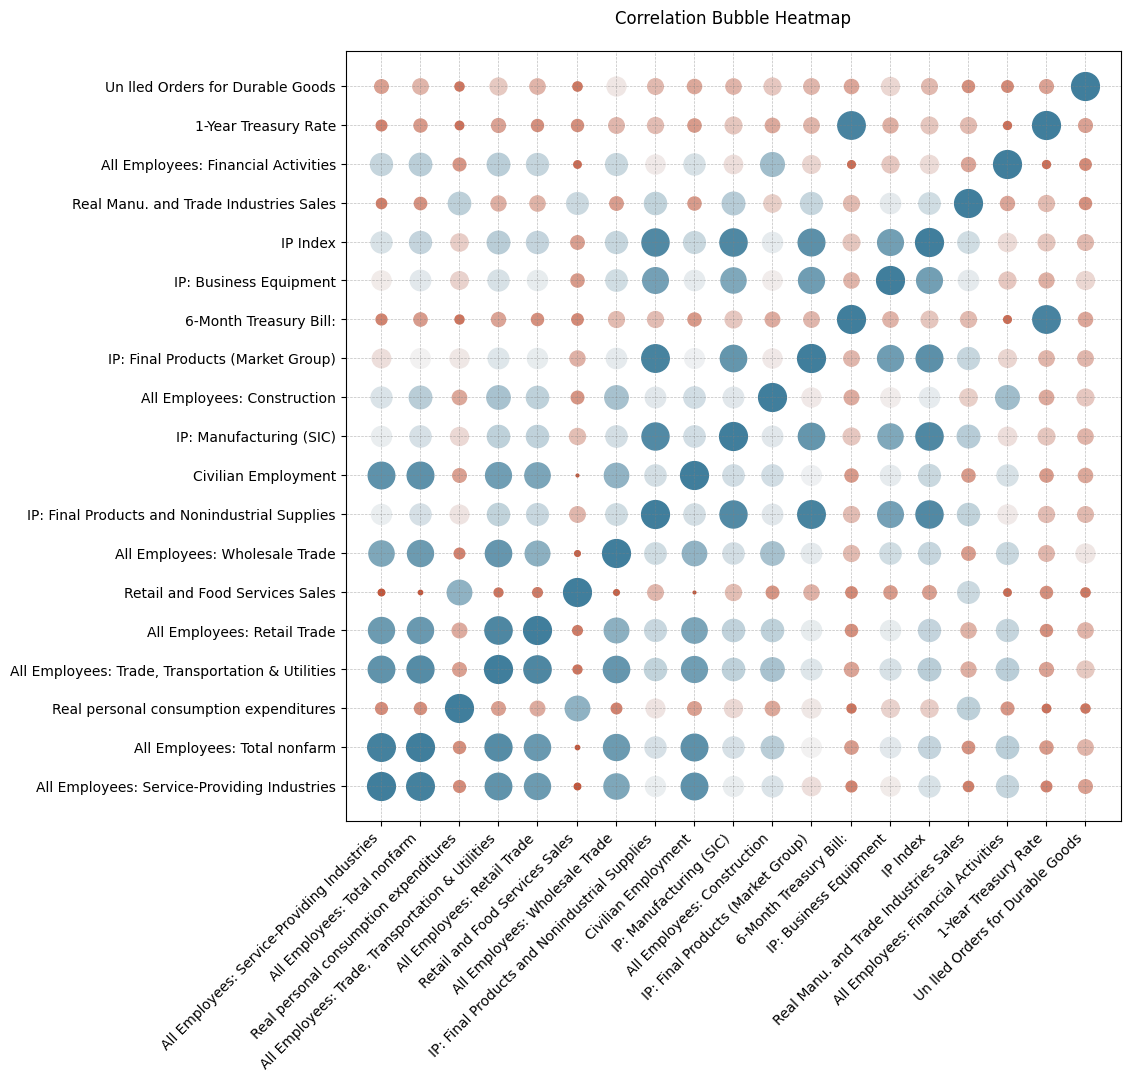

In [14]:
from visualisations.plot_correlation_circle_heatmap import plot_correlation_circle_heatmap

# target_correlations will have the Spearman's rank correlation coefficients
target_correlations = joined_dataset["PCE"].sort_values(ascending=False)


top_correlations = calculate_sorted_correlations(joined_dataset, "PCE")

plot_correlation_circle_heatmap(
    joined_dataset,
    top_correlations,
    top_n=20,
    fig_title="Correlation Bubble Heatmap",
)

<div style="color:#FF7F50">

**Observations**

</div>

The circular heatmap vividly illustrates the colinearity among various economic sectors. The size and color intensity of the circles denote the strength of the correlation between the indicators, revealing patterns that merit further investigation. You can clealry see certain blocks of indicators being formed.

- The heatmap indicates strong interconnections within labor and housing market indicators, suggesting these sectors may move in tandem or influence each other.
- The presence of colinearity could have implications for our analysis, as it may affect the reliability of our predictive models.

<div style="color:#FF7F50">

Next Steps:

</div>

To quantify the degree of multicollinearity and refine our understanding of these relationships, we will employ the Variance Inflation Factor (VIF) analysis. This statistical measure will help us detect the severity of multicollinearity and make informed decisions on model selection or variable exclusion.

By applying VIF, we will be able to discern which variables may be contributing excessively to multicollinearity, guiding our subsequent data modeling and analysis efforts.


<div style="color:#00BFFF">

**Variance Inflation Factor (VIF)**

</div>

VIF measures how much the variance of an estimated regression coefficient increases if the predictors are correlated. A VIF value greater than 10 is often considered indicative of multicollinearity.


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = joined_dataset.copy()

pce = X["PCE"]

# Exclude 'PCE' from VIF calculation but keep it in the dataset
X_without_PCE = X.drop(columns=["PCE"]) if "PCE" in X.columns else X.copy()

# Handle missing (NaN) and infinite (inf) values
X_without_PCE = X_without_PCE.fillna(X_without_PCE.mean())

vif_data = pd.DataFrame()
vif_data["feature"] = X_without_PCE.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_without_PCE.values, i)
    for i in range(X_without_PCE.shape[1])
]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

In [16]:
from visualisations.vif_bar_chart import vif_bar_chart

vif_bar_chart(vif_data)

<div style="color:#00BFFF">

---

##### Interpretation of EDA Findings and Actionable Steps


<div style="color:#FF7F50">

Next Steps

</div>

We dont want to outright drop these indicators with high colinearity as they may hold potential information, we will keep this information in mind and adress it after our full analyis.

To address these findings and prepare for model building and proxy selection, we propose the following steps:

<div style="color:#FF7F50">

1. **Proxy Selection**:
   </div>

   - Adopt a strategic approach to select proxies that not only exhibit strong correlations with our target, PCE, but also add unique information. to reduce Dimensionality We will conduct:
   - Linear Regression analysis to understand the predictive power of $R^2$ of each indicator to PCE
   - Then define a filtering threshold for proxies by their correlation coefficients and $R^2$ power.
   - Conduct stationary testing and remove variables that are non-stationary
   - Conduct and adress seasonality

<div style="color:#FF7F50">

2. **Dimension Reduction**
   </div>

   - These will then serve as our base proxies, on which we will implement dimensionality reduction techniques, such as Principal Component Analysis (PCA), to consolidate the information from highly correlated variables into fewer representative components.


<div style="color:#00BFFF">

---

##### Linear Regression Analysis to Determine Variable Influence on PCE


<div style="color:#FF7F50">

**Linear regression analysis:**

</div>

This section of the notebook conducts a linear regression analysis to explore how different variables in our dataset influence the Private Consumption Expenditure (PCE). The primary goal is to determine the strength of the linear relationship each variable has with PCE, quantified using the $R^2$ (coefficient of determination) metric.Variables with higher $R^2$ values are of particular interest as they may be key drivers of PCE variations.By understanding these relationships, we can better comprehend the dynamics influencing Private Consumption Expenditure, an essential component of economic analysis.

<div style="color:#FF7F50">

**Steps in the Analysis:**

</div>

1. **Data Preparation:**

   - We exclude 'PCE' from the list of independent variables as it is our dependent variable.
   - The dataset is cleaned to remove any rows with NaN or infinite values to ensure the validity of our regression analysis.

2. **Linear Regression:**

   - For each independent variable, we perform a simple linear regression against 'PCE'.
   - Only variables with a sufficient number of observations (set by `min_threshold`) are considered to ensure robust regression results.

3. **Calculation of $R^2$ Values:**
   - After fitting the model, we predict 'PCE' using each independent variable and compute the $R^2$ value.
   - The $R^2$ value indicates how much of the variance in 'PCE' is explained by the variable. A higher $R^2$ suggests a stronger explanatory power.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the independent variables (excluding 'PCE')
independent_vars = joined_dataset.drop(columns=["PCE"]).columns

# Prepare the dependent variable 'PCE'
dependent_var = joined_dataset["PCE"]

# Setting a minimum threshold for the number of observations required for regression
min_threshold = 30

# Dictionary to store R^2 values for each variable
r2_values = {}

# Perform linear regression for each independent variable
for var in independent_vars:
    # Drop rows where either the independent or dependent variable is NaN or infinite
    combined_data = joined_dataset[[var, "PCE"]].replace([np.inf, -np.inf], np.nan)
    # replace np.nan with 0
    combined_data = combined_data.dropna()

    if len(combined_data) >= min_threshold:
        # Prepare the data for regression
        X = combined_data[var].values.reshape(-1, 1)
        y = combined_data["PCE"].values

        # Create and fit the model
        model = LinearRegression()
        model.fit(X, y)

        # Predict and calculate R^2
        predictions = model.predict(X)
        r2_values[var] = r2_score(y, predictions)

# Sorting the R^2 values
r2_values_sorted = dict(
    sorted(r2_values.items(), key=lambda item: item[1], reverse=True)
)

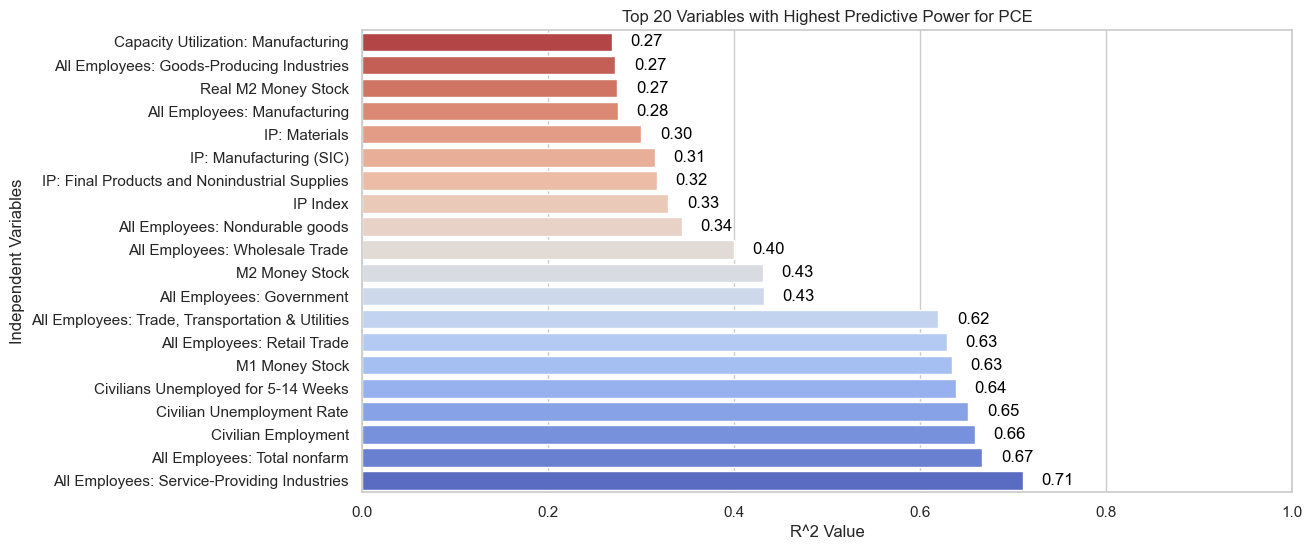

In [18]:
from visualisations.plot_top_correlations_barchart import plot_top_correlations_barchart

# call the plot_top_correlations_barchart function
plot_top_correlations_barchart(r2_values_sorted,top_n=20)


- The \( R^2 \) values are sorted and the top results are displayed.
- This ranking helps us identify which variables have the most significant linear relationship with 'PCE'.


In [19]:
indicators = top_correlations.drop("PCE")

# Assuming 'r2_values_sorted' and 'top_bottom_cor' are dictionaries or pandas Series
r2_values = pd.Series(r2_values_sorted)
cor_values = indicators  # .drop('PCE')  # Exclude PCE as it's a self-correlation

# Merge the two Series into a DataFrame and add groups
comparison_df = pd.DataFrame({"R_squared": r2_values, "Correlation": cor_values})

# Map the 'group' from 'defn' to 'comparison_df' based on the indicator descriptions
comparison_df = comparison_df.reset_index().rename(columns={"index": "description"})
comparison_df = comparison_df.merge(defn, on="description", how="left")

In [20]:
from visualisations.plot_scatter_bubble import plot_scatter_bubble

plot_scatter_bubble(comparison_df)

<div style="color:#00BFFF">

---

##### Proxy Selection


<div style="color:#FF7F50">

**Setting Threshold for Proxy selection**

</div>

For constructing a model for nowcasting, choosing the right number of variables (proxies in this case) is crucial for the model's performance and interpretability. Using too many variables can lead to overfitting and computational complexity, while too few may miss out on important information.

**Strategic approach Approach:**

Set Thresholds for Correlation and R-squared:
A correlation threshold (e.g., |Correlation| > 0.3) helps ensure that only variables significantly related to consumer spending (PCE) are included.
An R-squared threshold (e.g., R-squared > 0.25) ensures the variable has decent predictive power.


In [21]:
# Set thresholds
corr_threshold = 0.3
r_squared_threshold = 0.2

# Filter based on the thresholds
filtered_proxies = comparison_df[
    (comparison_df["Correlation"].abs() > corr_threshold)
    | (comparison_df["R_squared"] > r_squared_threshold)
]

# Now, 'filtered_proxies' contains variables meeting both criteria
selected_variables = filtered_proxies.description.tolist()

# Convert comparison_df.index to a list to ensure compatibility
columns_to_keep = selected_variables + ["PCE"]

# Filter the columns in final_proxy_dataset_for_validation
final_proxy_dataset = joined_dataset[columns_to_keep]

<div style="color:#00BFFF">

---

##### Proxy Evaluation for Seasonality and staionarity


<div style="color:#FF7F50">

**Seasonality Assessment**:

</div>

Function to Check for Seasonality: This function will calculate the autocorrelation function (ACF) values for specified lags and determine if any exceed a given threshold, indicating seasonality.
Function to Remove Seasonality: This function will apply seasonal decomposition to a time series and adjust it by removing the seasonal component, returning the adjusted series.


In [22]:
from statsmodels.tsa.stattools import acf


def check_seasonality(series, max_lag, threshold=0.3, seasonal_lags=[4, 8, 12, 16]):
    """
    Check if a time series exhibits seasonality.

    Parameters:
    - series: Time series data.
    - max_lag: Maximum lag to consider for the ACF.
    - threshold: Threshold for ACF values to consider significant.
    - seasonal_lags: Lags to check for seasonality.

    Returns:
    - Boolean indicating if any of the specified lags show significant autocorrelation.
    """
    acf_values = acf(series, nlags=max_lag, fft=True)
    return any(abs(acf_values[lag]) > threshold for lag in seasonal_lags)

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose


def seasonally_adjust(series, model="additive", period=12):
    """
    Adjusts a time series for seasonality.

    Parameters:
    - series: Time series data.
    - model: Type of decomposition ('additive' or 'multiplicative').
    - period: Seasonal period to adjust for.

    Returns:
    - Adjusted time series with seasonality removed.
    """
    result = seasonal_decompose(series, model=model, period=period)
    adjusted_series = result.trend + result.resid  # For additive model
    # For multiplicative model, use: adjusted_series = result.trend * result.resid
    return adjusted_series.dropna()  # Drop NaN values that result from decomposition

In [24]:
# Check for seasonality
seasonality_presence = {
    col: check_seasonality(final_proxy_dataset[col], max_lag=40)
    for col in final_proxy_dataset.columns
}
print("Indicators with seasonality:")
for key, value in seasonality_presence.items():
    if value:
        print(key)

# Adjust for seasonality where necessary
for indicator, has_seasonality in seasonality_presence.items():
    if has_seasonality:
        final_proxy_dataset[indicator] = seasonally_adjust(
            final_proxy_dataset[indicator]
        )

# Recheck for seasonality
seasonality_presence_after_adjustment = {
    col: check_seasonality(final_proxy_dataset[col], max_lag=40)
    for col in final_proxy_dataset.columns
}
print("\nIndicators with seasonality after adjustment:")
indicators_with_no_seasonality = True
for key, value in seasonality_presence_after_adjustment.items():
    if value:
        print(key)
        indicators_with_no_seasonality = False

if indicators_with_no_seasonality:
    print("No indicators have seasonality.")

Indicators with seasonality:
All Employees: Construction
All Employees: Financial Activities

Indicators with seasonality after adjustment:
No indicators have seasonality.


<div style="color:#FF7F50">

**Stationarity Assessment**:

</div>

Using tests like the Augmented Dickey-Fuller ensures that our time series data is suitable for modelling and forecasting, as many statistical models require stationarity for valid results.


In [25]:
from statsmodels.tsa.stattools import adfuller


# Function to perform Augmented Dickey-Fuller test
def adf_test(series, name=""):
    result = adfuller(series.dropna(), autolag="AIC")  # Drop NA values for the test
    conclusion = "Stationary" if result[1] < 0.05 else "Non-stationary"
    return {
        "Name": name,
        "Test Statistic": result[0],
        "P-Value": result[1],
        "Conclusion": conclusion,
    }


# Selecting a subset of series for stationarity testing, including PCE
series_to_test = selected_variables
adf_results = [
    adf_test(final_proxy_dataset[series], name=series) for series in series_to_test
]

adf_results_df = pd.DataFrame(adf_results)
adf_results_df

# add correlation and R^2 with PCE to the adf_results_df
adf_results_df["Correlation"] = [
    final_proxy_dataset[series].corr(final_proxy_dataset["PCE"])
    for series in series_to_test
]
adf_results_df["R_squared"] = [r2_values_sorted[series] for series in series_to_test]

# add VIF to the adf_results_df
adf_results_df["VIF"] = [
    vif_data[vif_data["feature"] == series].VIF.values[0] for series in series_to_test
]

# add its lead and lag analysis to the adf_results_df
pce_alternative_proxies = adf_results_df[
    [
        "Name",
        "Correlation",
        "R_squared",
        "VIF",
        "Test Statistic",
        "P-Value",
        "Conclusion",
    ]
]
# set Name as index
pce_alternative_proxies.set_index("Name", inplace=True)

pce_alternative_proxies.sort_values("Correlation", ascending=False, inplace=True)

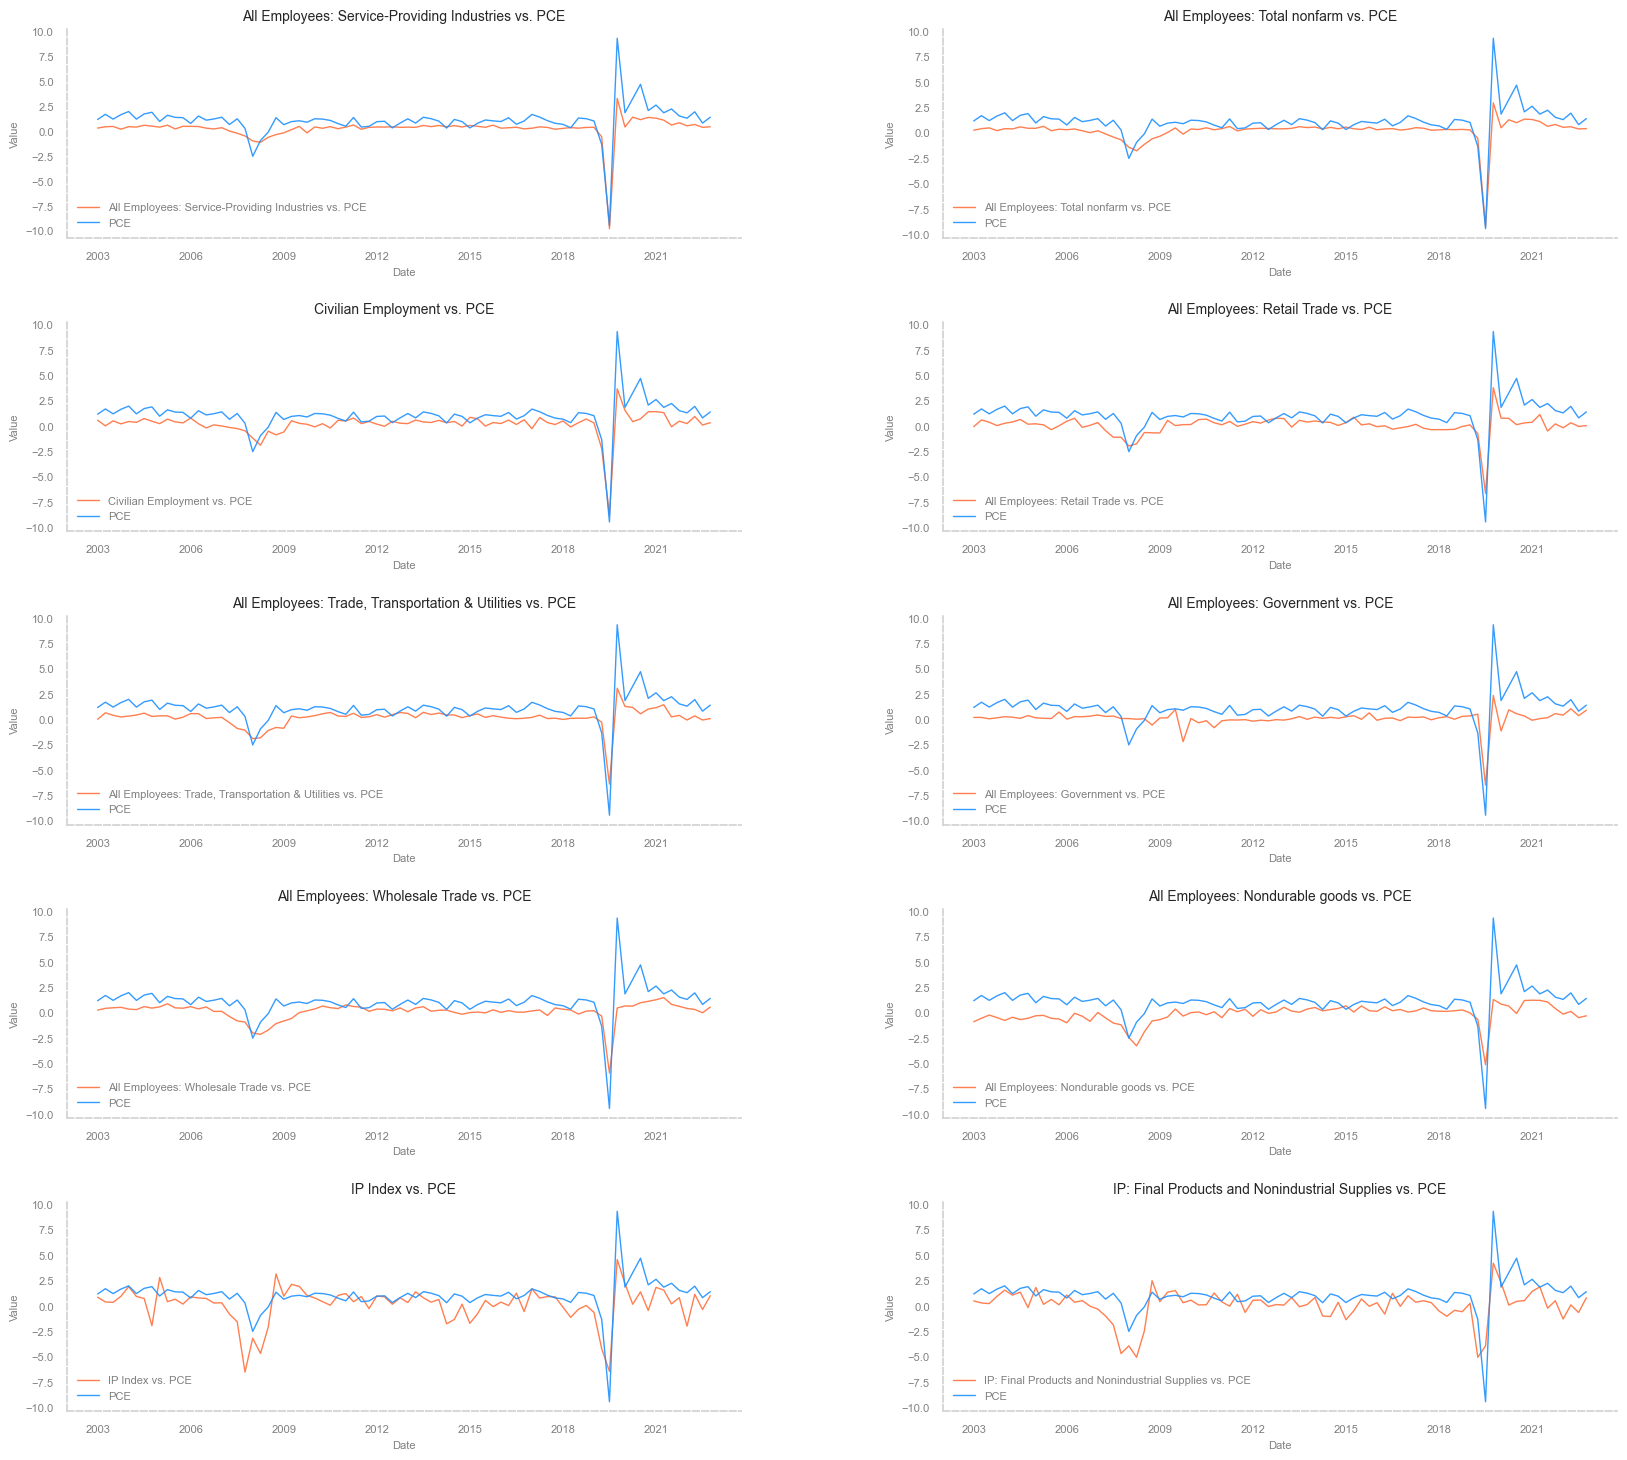

In [26]:
top_indicators_against_pce_line_graph(joined_dataset, pce_alternative_proxies, 9)

In [27]:
pce_alternative_proxies

,Correlation,R_squared,VIF,Test Statistic,P-Value,Conclusion
Name,,,,,,
All Employees: Service-Providing Industries,0.842804,0.710318,4722.311620,-7.817825,6.795139e-12,Stationary
All Employees: Total nonfarm,0.816759,0.667095,6267.548651,-7.083088,4.612122e-10,Stationary
Civilian Employment,0.811657,0.658787,1589.766890,-11.831759,7.960645e-22,Stationary
All Employees: Retail Trade,0.792999,0.628847,123.782299,-3.943042,1.739953e-03,Stationary
"All Employees: Trade, Transportation & Utilities",0.787222,0.619718,289.807388,-4.942793,2.876788e-05,Stationary
All Employees: Government,0.657109,0.431792,21.771273,-8.405125,2.178050e-13,Stationary
All Employees: Wholesale Trade,0.632347,0.399863,75.502065,-5.223009,7.889283e-06,Stationary
All Employees: Nondurable goods,0.586163,0.343587,6942.980598,-5.337777,4.570614e-06,Stationary
IP Index,0.573906,0.329369,20293.760220,-8.464421,1.536182e-13,Stationary


In [28]:
len(pce_alternative_proxies)

31

From the visualizations, we can observe a variety of distribution shapes across different indicators. Some distributions appear to be fairly symmetrical, while others show signs of skewness. The presence of kernel density estimates also provides a smooth curve that helps in identifying the distribution's shape beyond just the histogram bars.


<div style="color:#00BFFF">

---

##### Save Data


In [29]:
pce_alternative_proxies.to_csv("./results/final_dataset/pce_alternative_proxies.csv")

In [30]:
final_proxy_dataset.to_csv("./results/final_dataset/final_proxy_dataset.csv")